In [1]:
from land_cover import load
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
from libpysal.weights import KNN, DistanceBand
import contextily
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
import seaborn as sns

In [2]:
gdf = load.loadEffluxShp()
gdf.head()
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   lake_id        693 non-null    float64 
 1   Lake_area      693 non-null    float64 
 2   Outlet_n       693 non-null    int64   
 3   D_lake_id      574 non-null    object  
 4   D_lake_n       693 non-null    int64   
 5   D_lak_ntot     693 non-null    int64   
 6   U_lake_n       693 non-null    int64   
 7   U_lak_ntot     693 non-null    int64   
 8   Cat_a_lake     693 non-null    float64 
 9   Lake_type      693 non-null    object  
 10  Lake_order     693 non-null    int64   
 11  Laktyp_mhv     693 non-null    object  
 12  Lperm_glcp     693 non-null    float64 
 13  Basin_id       693 non-null    object  
 14  MERGE_SRC      693 non-null    object  
 15  Shape_Leng     693 non-null    float64 
 16  Shape_Area     693 non-null    float64 
 17  PLDNdistm_     0 non-null  

Example maps

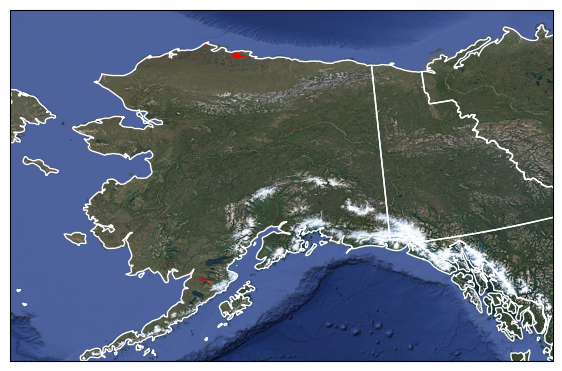

In [9]:
# Set up the plot with a specific Cartopy CRS for Alaska
fig, ax = plt.subplots(
    figsize=(7, 10), 
    subplot_kw={
    # 'projection': 'ESRI:102001'})
    'projection': ccrs.AlbersEqualArea(central_longitude=-152, central_latitude=63)})
        # 'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=40)})

# Zoom into Alaska
ax.set_extent([-170, -130, 54, 72], crs=ccrs.PlateCarree())

# Add Google Satellite imagery
ax.add_image(img_tiles.GoogleTiles(style='satellite'), 6)

# Add state outlines using Cartopy's features
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='white')

# Plot the GeoDataFrames
a=0.7
gdf.plot(ax=ax, color='red', markersize=5,
                   transform=ccrs.PlateCarree(), alpha=a, label='Efflux lakes')

# ax.legend(title='Legend', loc='upper right')
plt.show()